In [1]:
#datasets we use

#1. https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
# dataset with articles, mostly politics, labels: 1=fake, 0=real 


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [3]:
# importing and combining the datasets, labelling them as follows: labels: 0=fake, 1=real

import pandas as pd

fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')
true['label']=0
fake['label']=1

In [4]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [5]:
final = true.append(fake)
final.head()

C:\Users\janka\AppData\Local\Temp\ipykernel_16176\2590082196.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = true.append(fake)


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [6]:
#EDA with final dataset
# no NULL values
final.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [7]:
# Checking the DF size
final.shape
#There are 44898 rows and 5 columns - we don't need all columns

(44898, 5)

In [8]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [9]:
# Lets see how the texts are labled and distributed
final['label'].value_counts()

#23481 articles are real, 21417 articles are fake

1    23481
0    21417
Name: label, dtype: int64

In [10]:
#adding a length column where the characters of text column was counted
final['length'] = final['text'].apply(len)
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
 5   length   44898 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


In [11]:
# extracting the number of examples of each class 1 is real, 0 is fake
real = final[final['label'] == 0].shape[0]
fake = final[final['label'] == 1].shape[0]

In [12]:
# how many null values in the dataset
# these only check for int64 data types, label and length column does not have null values
print("Null values in data:")
print(final.isnull().sum())

Null values in data:
title      0
text       0
subject    0
date       0
label      0
length     0
dtype: int64


In [13]:
# how many nan values in the dataset
    
final = final.replace(' ', np.nan)                   # to replaca empty strings with nan values
nan_values = final[final.isna().any(axis=1)]         # to get all rows with Na values
nan_values                                     

,title,text,subject,date,label,length
8970,Graphic: Supreme Court roundup,NaN,politicsNews,"June 16, 2016",0,1
10923,TAKE OUR POLL: Who Do You Think President Trum...,NaN,politics,"May 10, 2017",1,1
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,NaN,politics,"Apr 26, 2017",1,1
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,NaN,politics,"Apr 6, 2017",1,1
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,NaN,politics,"Apr 2, 2017",1,1
...,...,...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,NaN,left-news,"Apr 27, 2015",1,1
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,NaN,left-news,"Apr 25, 2015",1,1
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,NaN,left-news,"Apr 25, 2015",1,1
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,NaN,left-news,"Apr 14, 2015",1,1


In [14]:
#dropping the values that are NaN

final = final.dropna(how = 'all')
final.drop(final[final.isna().any(axis=1)].index, inplace = True)

In [15]:
final.shape
#we have dropped 1238 rows in total with NaN values and values with empty strings

(43660, 6)

In [16]:
final.describe(include='all')

#as we have a mixed dataset with numeric and categorical data, we include all to display all datatype 

,title,text,subject,date,label,length
count,43660,43660,43660,43660,43660.000000,43660.000000
unique,37731,38069,8,2397,NaN,NaN
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"November 30, 2017",NaN,NaN
freq,14,8,11261,161,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.523454,2507.462093
std,NaN,NaN,NaN,NaN,0.499455,2173.168967
min,NaN,NaN,NaN,NaN,0.000000,2.000000
25%,NaN,NaN,NaN,NaN,0.000000,1299.000000
50%,NaN,NaN,NaN,NaN,1.000000,2212.000000
75%,NaN,NaN,NaN,NaN,1.000000,3126.000000


In [17]:
#describing only numerical datatype:

final.describe(include=[np.number])

,label,length
count,43660.000000,43660.000000
mean,0.523454,2507.462093
std,0.499455,2173.168967
min,0.000000,2.000000
25%,0.000000,1299.000000
50%,1.000000,2212.000000
75%,1.000000,3126.000000
max,1.000000,51794.000000


In [18]:
#describing only string object datatype:
final.describe(include=[np.object])


C:\Users\janka\AppData\Local\Temp\ipykernel_16176\999891621.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  final.describe(include=[np.object])


,title,text,subject,date
count,43660,43660,43660,43660
unique,37731,38069,8,2397
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"November 30, 2017"
freq,14,8,11261,161


In [19]:
#we have to get rid of duplicates
final = final.apply(lambda x: x.astype(str).str.lower()).drop_duplicates(subset=['title', 'text'], keep='first')


In [20]:
final.describe(include=[np.object])


C:\Users\janka\AppData\Local\Temp\ipykernel_16176\1014965618.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  final.describe(include=[np.object])


,title,text,subject,date,label,length
count,38083,38083,38083,38083,38083,38083
unique,37730,38069,7,2397,2,6703
top,factbox: trump fills top jobs for his administ...,via: tmz,politicsnews,"november 30, 2017",0,43
freq,14,2,11206,159,20620,40


In [21]:
#Data preparation for NLP
#Real news seems to have source of publication which is not present in fake news set
#These text have it at the beginning of the text such as"WASHINGTON (Reuters)".
#Some are tweets from twitter 
#We have to delete these html remainders

!pip install bs4

You should consider upgrading via the 'C:\Users\janka\PycharmProjects\dataspec\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [22]:
# I experiment with first 10 rows, if I find the proper cleaning method I will apply it to the rest of the data
first_title = final.title[10]
first_title

10    jones certified u.s. senate winner despite moo...
10     papa john’s founder retires, figures out raci...
Name: title, dtype: object

In [23]:
#removing html from titles

tags_list = ['<p>' ,'</p>' , '<p*>',
             '<ul>','</ul>',
             '<li>','</li>',
             '<br>',
             '<strong>','</strong>',
             '<span*>','</span>',
             '<a href*>','</a>',
             '<em>','</em>',
            'reuter']

for tag in tags_list:
  final['title'].replace(to_replace=tag, value='', regex=True, inplace=True)
print(first_title)

10    jones certified u.s. senate winner despite moo...
10     papa john’s founder retires, figures out raci...
Name: title, dtype: object


In [24]:
tags_list = ['<p>' ,'</p>' , '<p*>',
             '<ul>','</ul>',
             '<li>','</li>',
             '<br>',
             '<strong>','</strong>',
             '<span*>','</span>',
             '<a href*>','</a>',
             '<em>','</em>',
            'reuter']

for tag in tags_list:
  final['text'].replace(to_replace=tag, value='', regex=True, inplace=True)
print(final['text'].head())

#still the names of the sources are there

0    washington (s) - the head of a conservative re...
1    washington (s) - transgender people will be al...
2    washington (s) - the special counsel investiga...
3    washington (s) - trump campaign adviser george...
4    seattle/washington (s) - president donald trum...
Name: text, dtype: object


In [25]:
final['text'].head(50)

0     washington (s) - the head of a conservative re...
1     washington (s) - transgender people will be al...
2     washington (s) - the special counsel investiga...
3     washington (s) - trump campaign adviser george...
4     seattle/washington (s) - president donald trum...
5     west palm beach, fla./washington (s) - the whi...
6     west palm beach, fla (s) - president donald tr...
7     the following statements were posted to the ve...
8     the following statements were posted to the ve...
9     washington (s) - alabama secretary of state jo...
10    (s) - alabama officials on thursday certified ...
11    new york/washington (s) - the new u.s. tax cod...
12    the following statements were posted to the ve...
13    the following statements were posted to the ve...
14     (in dec. 25 story, in second paragraph, corre...
15    (s) - a lottery drawing to settle a tied virgi...
16    washington (s) - a georgian-american businessm...
17    the following statements were posted to th

In [26]:
final['text'] = final['text'].str.lstrip("(s) -")


In [27]:
final['text']
data = final['text']
    
data = data.str.split(r"(s) -",regex=False, expand=True)

# new data frame with split value columns
data

,0,1,2
0,washington,the head of a conservative republican faction...,None
1,washington,transgender people will be allowed for the fi...,None
2,washington,the special counsel investigation of links be...,None
3,washington,trump campaign adviser george papadopoulos to...,None
4,eattle/washington,president donald trump called on the u.s. pos...,None
...,...,...,...
22698,21st century wire says all the world s a stage...,None,None
22699,randy johnson 21st century wirethe majority of...,None,None
22700,tune in to the alternate current radio network...,None,None
22701,21st century wire says a new front has just op...,None,None


In [28]:
data.info

<bound method DataFrame.info of                                                        0  \
0                                            washington    
1                                            washington    
2                                            washington    
3                                            washington    
4                                     eattle/washington    
...                                                  ...   
22698  21st century wire says all the world s a stage...   
22699  randy johnson 21st century wirethe majority of...   
22700  tune in to the alternate current radio network...   
22701  21st century wire says a new front has just op...   
22702  21st century wire says it s not that far away....   

                                                       1     2  
0       the head of a conservative republican faction...  None  
1       transgender people will be allowed for the fi...  None  
2       the special counsel investigation of links b

In [29]:
data.insert(loc=1, column="string", value=(data[0].str.len()))
data

,0,string,1,2
0,washington,11,the head of a conservative republican faction...,None
1,washington,11,transgender people will be allowed for the fi...,None
2,washington,11,the special counsel investigation of links be...,None
3,washington,11,trump campaign adviser george papadopoulos to...,None
4,eattle/washington,18,president donald trump called on the u.s. pos...,None
...,...,...,...,...
22698,21st century wire says all the world s a stage...,7359,None,None
22699,randy johnson 21st century wirethe majority of...,26273,None,None
22700,tune in to the alternate current radio network...,1150,None,None
22701,21st century wire says a new front has just op...,20651,None,None


In [30]:
df2 = data.loc[data[1].isna()]
# extracting the values of the cleaned data - after the split, the original articles WHICH did not need cleaning >
# did not split - stayed at index0
# filtering out by NA values of index[1]

In [31]:
df2

,0,string,1,2
7,the following statements were posted to the ve...,850,None,None
8,the following statements were posted to the ve...,626,None,None
10,alabama officials on thursday certified democr...,2355,None,None
12,the following statements were posted to the ve...,593,None,None
13,the following statements were posted to the ve...,1192,None,None
...,...,...,...,...
22698,21st century wire says all the world s a stage...,7359,None,None
22699,randy johnson 21st century wirethe majority of...,26273,None,None
22700,tune in to the alternate current radio network...,1150,None,None
22701,21st century wire says a new front has just op...,20651,None,None


In [32]:
df3 = data.loc[data[1].notna()]

In [33]:
df3
# extracting the values of the cleaned data - after the split, the original articles that needed cleaning split to 3
# cleaned article starts at index[1] = filtering values out by not NA values at index[1]

,0,string,1,2
0,washington,11,the head of a conservative republican faction...,None
1,washington,11,transgender people will be allowed for the fi...,None
2,washington,11,the special counsel investigation of links be...,None
3,washington,11,trump campaign adviser george papadopoulos to...,None
4,eattle/washington,18,president donald trump called on the u.s. pos...,None
...,...,...,...,...
21412,brussels,9,nato allies on tuesday welcomed president don...,None
21413,london,7,"lexisnexis, a provider of legal, regulatory a...",None
21414,minsk,6,in the shadow of disused soviet-era factories...,None
21415,moscow,7,vatican secretary of state cardinal pietro pa...,None


In [34]:
#dropping unwanted columns of the splits, then merging together 

df2.drop(df2.columns[[1,2,3]], axis = 1, inplace = True)
df3.drop(df3.columns[[0,1,3]], axis = 1, inplace = True)

cleaned_text = df2.append(df3)

C:\Users\janka\AppData\Local\Temp\ipykernel_16176\1856237774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2.columns[[1,2,3]], axis = 1, inplace = True)
C:\Users\janka\AppData\Local\Temp\ipykernel_16176\1856237774.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(df3.columns[[0,1,3]], axis = 1, inplace = True)
C:\Users\janka\AppData\Local\Temp\ipykernel_16176\1856237774.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cleaned_text = df2.append(df3)


In [35]:
cleaned_text = df2.append(df3)
cleaned_text

C:\Users\janka\AppData\Local\Temp\ipykernel_16176\3812032264.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cleaned_text = df2.append(df3)


,0,1
7,the following statements were posted to the ve...,NaN
8,the following statements were posted to the ve...,NaN
10,alabama officials on thursday certified democr...,NaN
12,the following statements were posted to the ve...,NaN
13,the following statements were posted to the ve...,NaN
...,...,...
21412,NaN,nato allies on tuesday welcomed president don...
21413,NaN,"lexisnexis, a provider of legal, regulatory a..."
21414,NaN,in the shadow of disused soviet-era factories...
21415,NaN,vatican secretary of state cardinal pietro pa...


In [36]:
cleaned_text[0].fillna(cleaned_text[1], inplace=True)

#filling in the NAN values at index[0] with values from index[1]

In [37]:
cleaned_text

,0,1
7,the following statements were posted to the ve...,NaN
8,the following statements were posted to the ve...,NaN
10,alabama officials on thursday certified democr...,NaN
12,the following statements were posted to the ve...,NaN
13,the following statements were posted to the ve...,NaN
...,...,...
21412,nato allies on tuesday welcomed president don...,nato allies on tuesday welcomed president don...
21413,"lexisnexis, a provider of legal, regulatory a...","lexisnexis, a provider of legal, regulatory a..."
21414,in the shadow of disused soviet-era factories...,in the shadow of disused soviet-era factories...
21415,vatican secretary of state cardinal pietro pa...,vatican secretary of state cardinal pietro pa...


In [38]:
cleaned_text.drop(cleaned_text.columns[1], axis = 1, inplace = True)
#dropped column that is not needed

In [39]:
cleaned_text.rename(columns = {0:'cleaned_text'}, inplace = True)

In [40]:
cleaned_text = cleaned_text.sort_index()

In [41]:
cleaned_text
#sorted as the original text 

,cleaned_text
0,the head of a conservative republican faction...
0,donald trump just couldn t wish all americans ...
1,transgender people will be allowed for the fi...
1,house intelligence committee chairman devin nu...
2,"on friday, it was revealed that former milwauk..."
...,...
22698,21st century wire says all the world s a stage...
22699,randy johnson 21st century wirethe majority of...
22700,tune in to the alternate current radio network...
22701,21st century wire says a new front has just op...


In [42]:
final['text'] = cleaned_text['cleaned_text'].values
#replaced values to avoid indexing problems, this way we kept indexes and values in place

In [43]:
final #length is length of text

,title,text,subject,date,label,length
0,"as u.s. budget fight looms, republicans flip t...",the head of a conservative republican faction...,politicsnews,"december 31, 2017",0,4659
1,u.s. military to accept transgender recruits o...,donald trump just couldn t wish all americans ...,politicsnews,"december 29, 2017",0,4077
2,senior u.s. republican senator: 'let mr. muell...,transgender people will be allowed for the fi...,politicsnews,"december 31, 2017",0,2789
3,fbi russia probe helped by australian diplomat...,house intelligence committee chairman devin nu...,politicsnews,"december 30, 2017",0,2461
4,trump wants postal service to charge 'much mor...,"on friday, it was revealed that former milwauk...",politicsnews,"december 29, 2017",0,5204
...,...,...,...,...,...,...
22698,the white house and the theatrics of ‘gun cont...,21st century wire says all the world s a stage...,us_news,"january 7, 2016",1,7359
22699,activists or terrorists? how media controls an...,randy johnson 21st century wirethe majority of...,us_news,"january 7, 2016",1,26275
22700,"boiler room – no surrender, no retreat, heads ...",tune in to the alternate current radio network...,us_news,"january 6, 2016",1,1150
22701,federal showdown looms in oregon after blm abu...,21st century wire says a new front has just op...,us_news,"january 4, 2016",1,20651


In [44]:
final.to_csv('sorted.csv')

In [57]:
import nltk
from nltk import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords


#text cleaning for NLP
#Removal of Punctuation Marks
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)

# Removal of Special Characters
def remove_characters(text):
    return re.sub("[^a-zA-Z]"," ",text)

#Removal of stopwords 
def remove_stopwords_and_lemmatization(text):
    final_text = []
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    for word in text:
        if word not in set(stopwords.words('english')):
            lemma = nltk.WordNetLemmatizer()
            word = lemma.lemmatize(word) 
            final_text.append(word)
    return " ".join(final_text)

#Total function
def cleaning(text):
    text = remove_punctuations(text)
    text = remove_characters(text)
    text = remove_stopwords_and_lemmatization(text)
    return text

#Apply function on text column
cleaned =final['text'].apply(cleaning)

In [58]:
cleaned.to_csv('NLP_clean.csv')

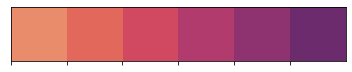

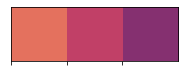

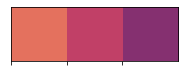

In [59]:
sns.palplot(sns.mpl_palette("flare"))
sns.palplot(sns.color_palette("flare", n_colors=3))
sns.palplot(sns.color_palette("flare", n_colors=3))

#setting three colors from palette flare as default



2022-05-18 18:00:20,330 [16176] WARNING  py.warnings:109: [JupyterRequire] c:\users\janka\pycharmprojects\dataspec\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

2022-05-18 18:00:20,374 [16176] WARNING  py.warnings:109: [JupyterRequire] C:\Users\janka\AppData\Local\Temp\ipykernel_16176\3695033076.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()



0    20620
1    17463
Name: label, dtype: int64


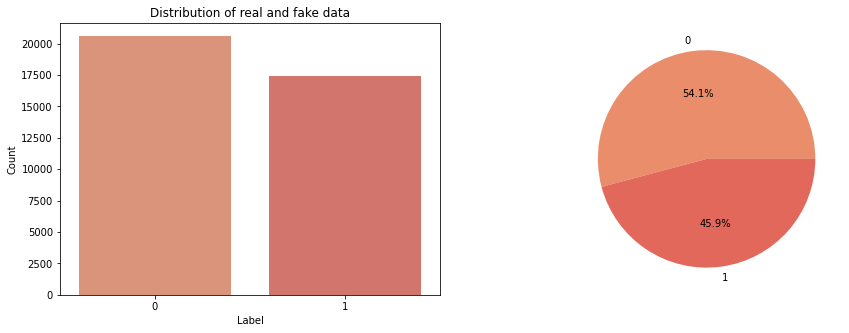

In [60]:
#Data visualizaton on cleaned data

sns.set_palette(palette='flare')
print(final["label"].value_counts())
fig, ax = plt.subplots(1,2, figsize=(15, 5))
g1 = sns.countplot(final.label,ax=ax[0])
g2 = plt.pie(final["label"].value_counts().values,explode=[0,0],labels=final.label.value_counts().index, autopct='%1.1f%%')
g1.set_title("Distribution of real and fake data")
g1.set_ylabel("Count")
g1.set_xlabel("Label")
fig.show()

politicsnews       11206
worldnews           9414
news                9049
politics            6432
us_news              783
left-news            684
government news      515
Name: subject, dtype: int64


Text(0.5, 1.0, 'Distribution of the subject according to real and fake data')

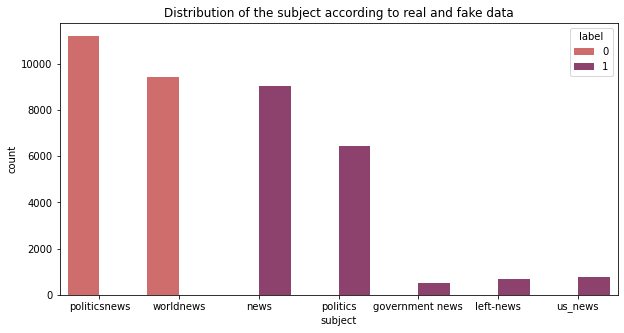

In [61]:
#Distribution of subject according to fake and real data

print(final.subject.value_counts())
plt.figure(figsize=(10, 5))

ax = sns.countplot(x="subject",  hue='label', data=final, palette="flare")
plt.title("Distribution of the subject according to real and fake data")

In [67]:
# NGRAM Analysis - n-grams are basically sequences of words/symbols. n refers to the number of sequences 
# if n-gram has 1 sequence we call them unigram, if they have two sequences bigram, three = trigram
# a unigram gives us the most frequent words, bigrams the most frequent 2 words used together and so on

#text used is the cleaned text data, we copy them and declare the string for the function, split at whitespaces

texts = ' '.join(cleaned)
string = texts.split(" ")

In [68]:
#parameters: string = string dtype, i = number of variables we would like to check their frequency of
#declared n_gram as a df where we used nltk.ngram(string, i) function and grouped it by the count of highest values, 
#limited to the first 15 highest result
#renamed the columns of the df and plotted the diagram 

def draw_n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:15]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (16,9))
    return sns.barplot(x='count',y='word', data=n_gram_df,palette='flare')

           word   count
0      (trump,)  122337
1       (said,)  120117
2          (u,)   62114
3      (state,)   53426
4  (president,)   49176


<AxesSubplot:xlabel='count', ylabel='word'>

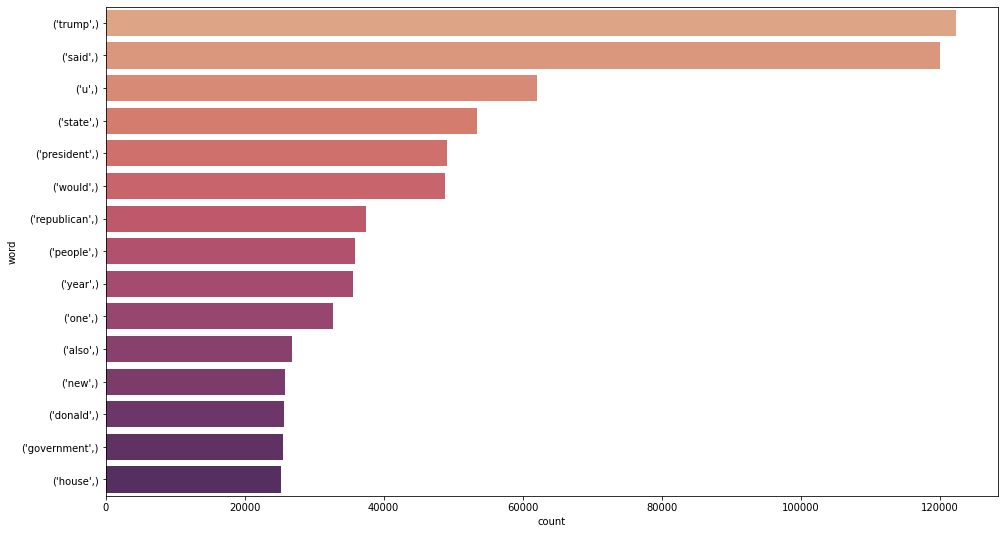

In [69]:
#Unigram analysis
draw_n_gram(string,1)

                 word  count
0     (donald, trump)  22210
1     (united, state)  16725
2      (white, house)  13479
3   (featured, image)   8069
4  (hillary, clinton)   7902


<AxesSubplot:xlabel='count', ylabel='word'>

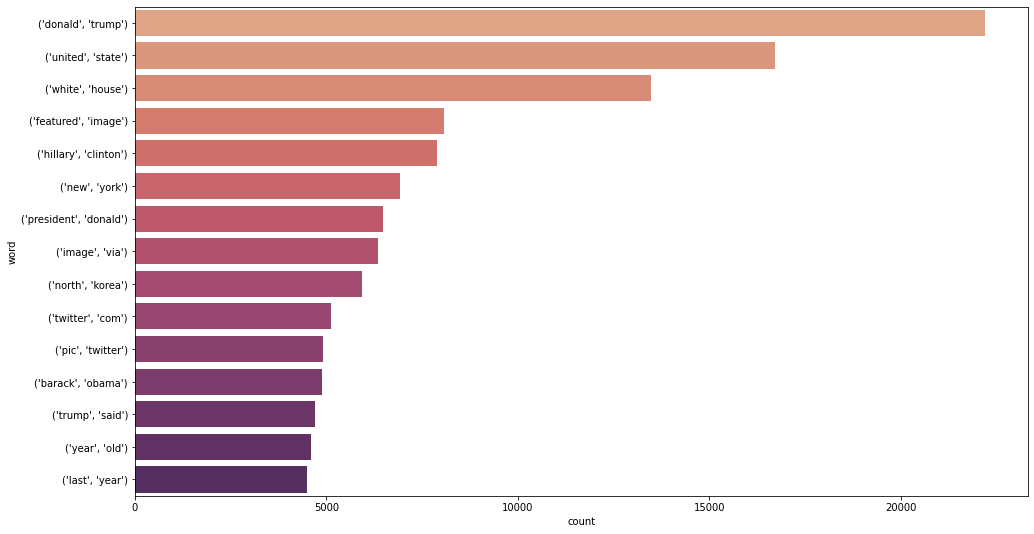

In [70]:
#Bigram analysis - should display the two words that are most frequently used together
draw_n_gram(string,2)


                         word  count
0  (president, donald, trump)   6346
1      (featured, image, via)   6028
2         (pic, twitter, com)   4899
3  (president, barack, obama)   3580
4      (u, president, donald)   2466


<AxesSubplot:xlabel='count', ylabel='word'>

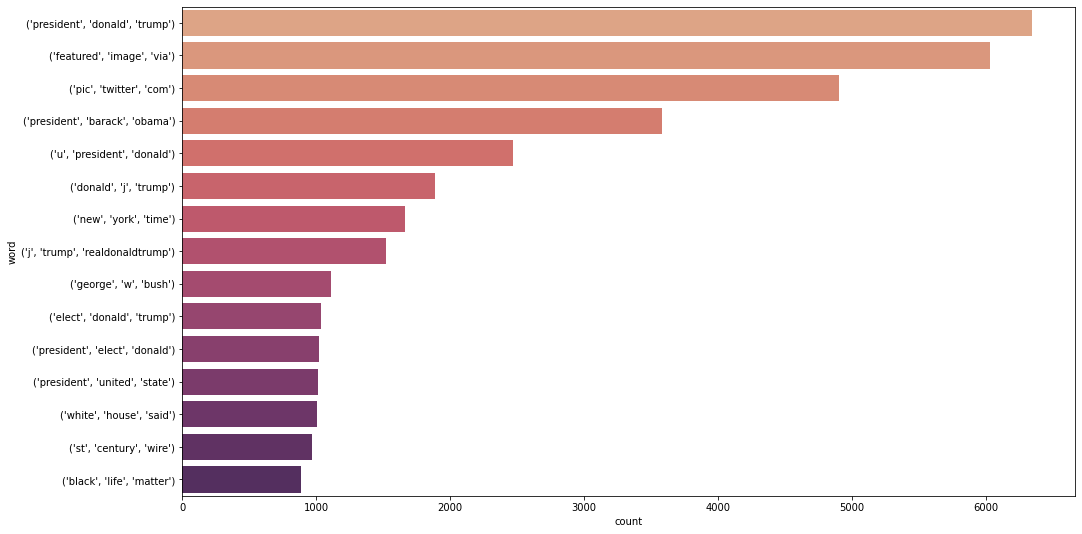

In [71]:
draw_n_gram(string,3)
#trigram analysis - should display the three words that are most frequently used together

